In [36]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

In [119]:
# DEBUG 

# UNDISTORD IMAGES
nb_vertical = 5
nb_horizontal = 15

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nb_horizontal*nb_vertical,3), np.float32)
objp[:,:2] = np.mgrid[0:nb_vertical,0:nb_horizontal].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints_left = [] # 2d points in image plane.
imgpoints_right = [] # 2d points in image plane.

####################################### CAREFULL DEAR LINUX USERS ################################################
images_left = '/home/hhauter/Documents/S23/Perception/34759-Perception-Exercises/2023_final_project/final_project/calib/2.png'
# images_left ='/home/hhauter/Documents/S23/Perception/34759-Perception-Exercises/2023_final_project/final_project/calib/image_03/data/0000000000.png'
# 2
# gray_left = cv2.addWeighted(gray_left, 3.0, blurred, -0.6, 0)
# 12
# masked_img = cv2.addWeighted(gray_left, 1.5, blurred, -0.5, 0)


flags=cv2.CALIB_CB_ADAPTIVE_THRESH +cv2.CALIB_CB_FAST_CHECK +cv2.CALIB_CB_NORMALIZE_IMAGE



img = cv2.imread(images_left)
gray_left = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

applyFilter = -0.9
blurred = cv2.GaussianBlur(gray_left, (0, 0), 3)
masked_img = cv2.addWeighted(gray_left, 3.0, blurred, applyFilter, 0)

cv2.imshow('img',masked_img)
cv2.waitKey()

ret, corners= cv2.findChessboardCorners(masked_img, (nb_vertical,nb_horizontal), None)
print(ret)
print(corners)
if ret:
    corners = cv2.cornerSubPix(masked_img, corners, (11,11), (-1,-1), (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001))
    img = cv2.drawChessboardCorners(masked_img, (nb_vertical,nb_horizontal), corners, True)
cv2.imshow('img',img)
cv2.waitKey()

 


cv2.destroyAllWindows()
# blurred = cv2.GaussianBlur(gray_left, (0, 0), 3)
# gray_left = cv2.addWeighted(gray_left, 3.0, blurred, -0.8, 0)
# laplacian = cv2.Laplacian(gray_left, cv2.CV_8U,ksize=9)
# gray_left = cv2.addWeighted(gray_left, 1.0, laplacian, -0.05, 0)



# # Convert to grayscale
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# # Threshold the image to create a binary mask
# ret, mask = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

# # Find the contours in the mask
# contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Extract the corners from the contours
# corners = []
# for contour in contours:
#     # Approximate the contour as a polygon with epsilon = 0.01 * perimeter
#     perimeter = cv2.arcLength(contour, True)
#     epsilon = 0.01 * perimeter
#     approx = cv2.approxPolyDP(contour, epsilon, True)

#     # If the polygon has exactly 4 vertices, it's a potential corner
#     if len(approx) == 4:
#         corners.extend(approx.tolist())

# # Draw the detected corners on the original image
# for corner in corners:
#     x, y = corner[0]
#     cv2.circle(img, (x, y), 5, (0, 0, 255), -1)





# # ### Insert Harris Corner detector here ###
# # dst = cv2.cornerHarris(gray, 2,5,0.04)

# # ### Draw the detected corners in the original image here ###
# # img[dst>0.01*dst.max()]=[255,0,0]

# # Display image
# plt.imshow(img)
# cv2.imshow('Corners', img)
# cv2.waitKey()

# Set the parameters for the Harris corner detector
# block_size = 2
# aperture_size = 3
# k = 0.04

# # Detect corners using the Harris corner detector
# corners = cv2.cornerHarris(gray_left, block_size, aperture_size, k)

# # Threshold the corner response to isolate strong corners
# threshold = 0.01 * corners.max()
# corner_mask = (corners > threshold).astype(int)

# # Display the corners on the original image
# img[corner_mask == 1] = [0, 0, 255]  # mark corners in red
# cv2.imshow('Corners', img)
# cv2.waitKey(0)
# applyFilter = -1.5
# blurred = cv2.GaussianBlur(gray_left, (0, 0), 3)
# masked_img = cv2.addWeighted(gray_left, 1.5, blurred, applyFilter, 0)
# ret, corners_left = cv2.findChessboardCorners(gray_left, (nb_vertical,nb_horizontal),flags=flags)
# print(ret)
# # If found, add object points, image points (after refining them)
# if ret == True:
#     objpoints.append(objp)

#     imgpoints_left.append(corners_left)


#     img = cv2.drawChessboardCorners(gray_left, (nb_vertical,nb_horizontal), corners_left,ret)
#     cv2.imshow('img',img)
#     cv2.waitKey()

# cv2.destroyAllWindows()

False
None


In [ ]:
cv2.destroyAllWindows()

In [3]:
# DEBUG 

# UNDISTORD IMAGES
nb_vertical = 5
nb_horizontal = 7

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nb_horizontal*nb_vertical,3), np.float32)
objp[:,:2] = np.mgrid[0:nb_vertical,0:nb_horizontal].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints_left = [] # 2d points in image plane.
imgpoints_right = [] # 2d points in image plane.

####################################### CAREFULL DEAR LINUX USERS ################################################
images_left = sorted(glob.glob('/home/hhauter/Documents/S23/Perception/34759-Perception-Exercises/2023_final_project/final_project/calib/test.png'))
images_right = sorted(glob.glob('/home/hhauter/Documents/S23/Perception/34759-Perception-Exercises/2023_final_project/final_project/calib/image_03/data/*.png'))
assert images_left
assert images_right


for fname in range(len(images_left)):
    img_left = cv2.imread(images_left[fname])
    gray_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)
    img_right = cv2.imread(images_right[fname])
    gray_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)
    ret, corners_left = cv2.findChessboardCorners(gray_left, (nb_vertical,nb_horizontal))
    ret, corners_right = cv2.findChessboardCorners(gray_right, (nb_vertical,nb_horizontal))

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        imgpoints_left.append(corners_left)
        imgpoints_right.append(corners_right)

        img = cv2.drawChessboardCorners(img_left, (nb_vertical,nb_horizontal), corners_left,ret)
        cv2.imshow('img',img)
        cv2.waitKey(5000)

cv2.destroyAllWindows()

In [17]:
import cv2
import numpy as np

# Load the left and right checkerboard images
images_left = sorted(glob.glob('/home/hhauter/Documents/S23/Perception/34759-Perception-Exercises/2023_final_project/final_project/calib/image_02/data/*.png'))
images_right = sorted(glob.glob('/home/hhauter/Documents/S23/Perception/34759-Perception-Exercises/2023_final_project/final_project/calib/image_03/data/*.png'))
assert images_left
assert images_right

img_left = cv2.imread(images_left[0])
img_right = cv2.imread(images_right[0])


# Define the number of inner corners in each checkerboard pattern
patterns = [(5, 7)]*10 + [(7, 11)]*2 + [(5, 15)]
num_patterns = len(patterns)

# Collect the coordinates of the internal corners of each checkerboard pattern in both the left and right images
objpoints = [] # 3D points in real world space
imgpoints_left = [] # 2D points in left image plane
imgpoints_right = [] # 2D points in right image plane

for pattern in patterns:
    num_corners_x, num_corners_y = pattern
    num_corners = num_corners_x * num_corners_y
    
    # Define the object points for the checkerboard pattern
    object_points = np.zeros((num_corners, 3), np.float32)
    object_points[:, :2] = np.mgrid[0:num_corners_x, 0:num_corners_y].T.reshape(-1, 2)
    object_points *= 10.0 # the checkerboard square size is 10 mm
    
    # Detect the corners in the left and right images
    gray_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)
    gray_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)
    ret_left, corners_left = cv2.findChessboardCorners(gray_left, pattern, None)
    ret_right, corners_right = cv2.findChessboardCorners(gray_right, pattern, None)
    
    # Collect the coordinates of the internal corners in both images
    if ret_left and ret_right:
        objpoints.append(object_points)
        imgpoints_left.append(corners_left)
        imgpoints_right.append(corners_right)
        img = cv2.drawChessboardCorners(gray_left, pattern, corners_left, ret_left)
        cv2.imshow('img',img)
        cv2.waitKey(700)

cv2.destroyAllWindows()
# Use the 2D image coordinates and the 3D world coordinates of the checkerboard corners to calibrate the left and right cameras
# ret, mtx_left, dist_left, mtx_right, dist_right, R, T, E, F = cv2.stereoCalibrate(objpoints, imgpoints_left, imgpoints_right, None, None, None, None, img_left.shape[::-1], flags=cv2.CALIB_FIX_INTRINSIC)

# # Use the calibration parameters to rectify the images and compute the stereo disparity map
# R_left, R_right, P_left, P_right, Q, roi_left, roi_right = cv2.stereoRectify(mtx_left, dist_left, mtx_right, dist_right, img_left.shape[::-1], R, T)
# map_left_x, map_left_y = cv2.initUndistortRectifyMap(mtx_left, dist_left, R_left, P_left, img_left.shape[::-1], cv2.CV_32FC1)
# map_right_x, map_right_y = cv2.initUndistortRectifyMap(mtx_right, dist_right, R_right, P_right, img_right.shape[::-1], cv2.CV_32FC1)

Chessboards
- given are 13 chessboards of diffrent dimensions:
- (7, 11), (7, 11), (5, 7), (5, 7), (5, 7), (5, 7), (5, 7), (5, 7), (5, 15), (5, 7),(5, 7),(5, 7),(5, 7)
- The checkerboard pattern used in the calibration sequence has squares with a size of approximately 10cm.


In [2]:
# UNDISTORD IMAGES
patterns = [{'pattern': (5,7), 'count': 10},    # 1208- 1320
            {'pattern': (7,11), 'count': 2},    # 0-466
            {'pattern': (5,15), 'count': 1}]    # 466-1208 and 1320 - 1390

images_left = sorted(glob.glob('/home/hhauter/Documents/S23/Perception/34759-Perception-Exercises/2023_final_project/final_project/calib/image_02/data/*.png'))
images_right = sorted(glob.glob('/home/hhauter/Documents/S23/Perception/34759-Perception-Exercises/2023_final_project/final_project/calib/image_03/data/*.png'))
assert images_left
assert images_right

test_img = cv2.imread(images_left[0])
imgpoints_left = []
imgpoints_right = []
# create mask to make already detected chessboards invisible
mask = np.zeros((test_img.shape[0], test_img.shape[1]), dtype=np.uint8)

# read images
img_left = cv2.imread(images_left[0])
gray_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)
cv2.imshow('img',img_left)
cv2.waitKey()
img_right = cv2.imread(images_right[0])
gray_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)
# try to sharpen the image 
# LAPLACE
# laplacian = cv2.Laplacian(gray_left, cv2.CV_8U,ksize=9)
# output = cv2.addWeighted(gray_left, 1.0, laplacian, -0.1, 0)

# GAUSSIAN
blurred = cv2.GaussianBlur(gray_left, (0, 0), 3)
output = cv2.addWeighted(gray_left, 1.5, blurred, -1.0, 0)
# laplacian = cv2.Laplacian(gray_left, cv2.CV_8U,ksize=9)
# output = cv2.addWeighted(output, 1.0, laplacian, -0.1, 0)

cv2.imshow('img', output)
cv2.waitKey(700)

gray_left = output

for pattern in patterns:
    iterations = 0
    print('Pattern: ')
    print(pattern)
    cnt = pattern['count']
    count = 0
    
    _pattern = pattern['pattern']
    while count != cnt and iterations < (cnt * 2):
        print("Count: ")
        print(count)
        print("Iteration: ")
        print(iterations)
        # detect chessboard corners for current pattern
        ret, corners_left = cv2.findChessboardCorners(gray_left, pattern['pattern'], None)
        ret_right, corners_right = cv2.findChessboardCorners(gray_right, pattern['pattern'], None)
        
        
        # then if corners are found add them to detected list and update mask
        if ret:
            print("FOUND CHESSBOARD")
            # add the corners to the detected chessboard list
            imgpoints_left.append(corners_left)
            imgpoints_right.append(corners_right)
            
            # create a new mask for this chessboard and update overall mask
            # chessboard_mask = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
            mask = np.zeros_like(gray_left)
            # square_points = np.int32([corners_left[0], corners_left[_pattern[0]-1], corners_left[_pattern[1]-1], corners_left[int(_pattern[0]*_pattern[1]-1)]])
            # cv2.drawContours(mask, [np.int32(corners_left)], 0, (255, 255, 255), cv2.FILLED)
            # cv2.fillPoly(mask, [np.int32(corners_left)], (255, 255, 255))
            center = np.mean(corners_left, axis=0)[0]
            mask = np.zeros_like(gray_left)
            mask_width = 90
            mask_height = 100
            mask[int(center[1] - mask_height/2):int(center[1] + mask_height/2),
                int(center[0] - mask_width/2):int(center[0] + mask_width/2)] = 255

            # apply the mask to the original image
            masked_img_left = cv2.bitwise_and(gray_left, gray_left, mask=255-mask)

            img = cv2.drawChessboardCorners(gray_left, pattern['pattern'], corners_left, ret)
            cv2.imshow('img',img)
            cv2.waitKey(700)
            cv2.imshow('img',masked_img_left)
            cv2.waitKey(700)

            gray_left = masked_img_left
            count += 1

        iterations += 1
            



cv2.destroyAllWindows()




Pattern: 
{'pattern': (5, 7), 'count': 10}
Count: 
0
Iteration: 
0
FOUND CHESSBOARD
Count: 
1
Iteration: 
1
FOUND CHESSBOARD
Count: 
2
Iteration: 
2
FOUND CHESSBOARD
Count: 
3
Iteration: 
3
FOUND CHESSBOARD
Count: 
4
Iteration: 
4
FOUND CHESSBOARD
Count: 
5
Iteration: 
5
FOUND CHESSBOARD
Count: 
6
Iteration: 
6
Count: 
6
Iteration: 
7
Count: 
6
Iteration: 
8
Count: 
6
Iteration: 
9
Count: 
6
Iteration: 
10
Count: 
6
Iteration: 
11
Count: 
6
Iteration: 
12
Count: 
6
Iteration: 
13
Count: 
6
Iteration: 
14
Count: 
6
Iteration: 
15
Count: 
6
Iteration: 
16
Count: 
6
Iteration: 
17
Count: 
6
Iteration: 
18
Count: 
6
Iteration: 
19
Pattern: 
{'pattern': (7, 11), 'count': 2}
Count: 
0
Iteration: 
0
FOUND CHESSBOARD
Count: 
1
Iteration: 
1
Count: 
1
Iteration: 
2
Count: 
1
Iteration: 
3
Pattern: 
{'pattern': (5, 15), 'count': 1}
Count: 
0
Iteration: 
0
Count: 
0
Iteration: 
1


In [106]:
# functions to mask images and detect chessboard corners 
def detectChessBoard(img, pattern, xRegion, yRegion, applyFilter):
    mask = np.zeros(img.shape[:2], dtype=np.uint8)
    roi = (xRegion[0], yRegion[0], xRegion[1]-xRegion[0], yRegion[1]-yRegion[0])
    cv2.rectangle(mask, roi, 255, -1)
    masked_img = cv2.bitwise_and(img, img, mask=mask)
    cv2.imshow('img',masked_img)
    cv2.waitKey()
    if applyFilter:
        blurred = cv2.GaussianBlur(masked_img, (0, 0), 3)
        masked_img = cv2.addWeighted(masked_img, applyFilter[0], blurred, applyFilter[1], 0)

    ret, corners= cv2.findChessboardCorners(masked_img, pattern, None)
    if ret:
        corners = cv2.cornerSubPix(masked_img, corners, (11,11), (-1,-1), (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001))
        img = cv2.drawChessboardCorners(masked_img, pattern, corners, True)
        cv2.imshow('img',img)
        cv2.waitKey()

    return ret, corners
        

In [30]:
# functions to mask images and detect chessboard corners with harris algorithm
def detectChessBoardHarris(img, pattern, xRegion, yRegion):
    mask = np.zeros(img.shape[:2], dtype=np.uint8)
    roi = (xRegion[0], yRegion[0], xRegion[1]-xRegion[0], yRegion[1]-yRegion[0])
    cv2.rectangle(mask, roi, 255, -1)
    masked_img = cv2.bitwise_and(img, img, mask=mask)

    dst = cv2.cornerHarris(masked_img, 2,5,0.04)

    ### Draw the detected corners in the original image here ###
    masked_img[dst>0.01*dst.max()]=[255,0,0]

    cv2.imshow('Corners', masked_img)
    cv2.waitKey()


    return dst

In [107]:
# LEFT 
checkerboards_left = [{'pattern': (7,11), 'count': 2, 'xValues': [(0,366),
    (356,476)], 'yValues': [(0, 600),
    (177,355)], 'applyFilters': [None, (1.5,-1.0)]},
            {'pattern': (5,7), 'count': 10,'xValues': [(466,640),
    (500,625),
    (476,674),
    (680,791),
    (786,910),
    (790,930),
    (1022,1210),
    (1090,1200),
    (980,1160), 
    (1330,1390)], 'yValues': [(60,150),
    (270,394),
    (395,500),
    (290,435),
    (290,435),
    (125,220),
    (60,150),
    (240,380),
    (380,470),
    (175,350)], 'applyFilters': [(1.5,-1.0), (1.5,-1.0), None, None, None, None, None, None, (1.5,-1.0), None]},    
            {'pattern': (5,15), 'count': 1,'xValues': [(1240,1315)], 'yValues': [(170,435)], 'applyFilters': [(1.5,-0.5)]}]    
###########################################################

In [108]:
# RIGHT
# gray_left = cv2.addWeighted(gray_left, 3.0, blurred, -0.6, 0)
checkerboards_right = [{'pattern': (7,11), 'count': 2, 'xValues': [(0,250),
    (300,400)], 'yValues': [(155, 340),
    (185,320)], 'applyFilters': [None, (3.0,-0.6)]},
            {'pattern': (5,7), 'count': 10,'xValues': [(377,540),
    (445,530),
    (415,570),
    (600,690),

    (710,810),
    (700,830),

    (900,1070),
    (1000,1100),
     
    (880,1030),
    (1210,1265)], 'yValues': [(85,160),
    (270,385),
    (385,475),
    (290,435),
    (290,435),
    (125,220),

    (60,140),
    (245,365),
    (360,450),
    (170,345)], 'applyFilters': [(1.5,-1.0), (1.5,-1.0), None, None, None, None, None, None, (1.5,-1.0), (1.5,-0.5)]},    
            {'pattern': (5,15), 'count': 1,'xValues': [(1135,1200)], 'yValues': [(160,425)], 'applyFilters': [(1.5,-0.5)]}]    
###########################################################


In [31]:
# try with areas 

images_left = sorted(glob.glob('/home/hhauter/Documents/S23/Perception/34759-Perception-Exercises/2023_final_project/final_project/calib/image_02/data/*.png'))
images_right = sorted(glob.glob('/home/hhauter/Documents/S23/Perception/34759-Perception-Exercises/2023_final_project/final_project/calib/image_03/data/*.png'))
assert images_left
assert images_right

test_img = cv2.imread(images_left[0])
imgpoints_left = []
imgpoints_right = []
# create mask to make already detected chessboards invisible
mask = np.zeros((test_img.shape[0], test_img.shape[1]), dtype=np.uint8)

# read images
img_left = cv2.imread(images_left[0])
gray_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)

img_right = cv2.imread(images_right[0])
gray_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)

cv2.imshow('img',img_right)
cv2.waitKey()

for cb_left, cb_right in zip(checkerboards_left, checkerboards_right):
    count = cb_left['count']
    print(pattern)
    for i in range(count):
        corners_left = detectChessBoardHarris(img_left, cb_left['pattern'], cb_left['xValues'][i], cb_left['yValues'][i])
        # ret_right, corners_right = detectChessBoard(img_right, cb_right['pattern'], cb_right['xValues'][i], cb_right['yValues'][i], cb_right['applyFilters'][i])

cv2.destroyAllWindows()




(5, 15)


error: OpenCV(4.7.0) /io/opencv/modules/imgproc/src/corner.cpp:254: error: (-215:Assertion failed) src.type() == CV_8UC1 || src.type() == CV_32FC1 in function 'cornerEigenValsVecs'


In [120]:
# try with Harris

images_left = sorted(glob.glob('/home/hhauter/Documents/S23/Perception/34759-Perception-Exercises/2023_final_project/final_project/calib/image_02/data/*.png'))
images_right = sorted(glob.glob('/home/hhauter/Documents/S23/Perception/34759-Perception-Exercises/2023_final_project/final_project/calib/image_03/data/*.png'))
assert images_left
assert images_right

test_img = cv2.imread(images_left[0])

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints_left = [] # 2d points in image plane.
imgpoints_right = [] # 2d points in image plane.
# create mask to make already detected chessboards invisible
mask = np.zeros((test_img.shape[0], test_img.shape[1]), dtype=np.uint8)

# read images
img_left = cv2.imread(images_left[0])
gray_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)

img_right = cv2.imread(images_right[0])
gray_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)

cv2.imshow('img',img_right)
cv2.waitKey()

for cb_left, cb_right in zip(checkerboards_left, checkerboards_right):
    count = cb_left['count']
    print(pattern)
    for i in range(count):
        ret_left, corners_left = detectChessBoard(img_left, cb_left['pattern'], cb_left['xValues'][i], cb_left['yValues'][i], cb_left['applyFilters'][i])
        ret_right, corners_right = detectChessBoard(img_right, cb_right['pattern'], cb_right['xValues'][i], cb_right['yValues'][i], cb_right['applyFilters'][i])
        if ret_left and ret_right:
            objp = np.zeros((cb_left['pattern'][0]*cb_left['pattern'][1],3), np.float32)
            objp[:,:2] = np.mgrid[0:cb_left['pattern'][1],0:cb_left['pattern'][0]].T.reshape(-1,2)
            objpoints.append(objp)
            imgpoints_left.append(corners_left)
            imgpoints_right.append(corners_right)
            
cv2.destroyAllWindows()



(5, 15)
(5, 15)
(5, 15)


In [122]:
# get camera matrices
ret, K_left, dist_left, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints_left, gray_left.shape[::-1], None, None)
ret, K_right, dist_right, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints_right, gray_right.shape[::-1], None, None)

h,  w = img.shape[:2]
K_left, roi = cv2.getOptimalNewCameraMatrix(K_left,dist_left,(w,h),1,(w,h))
K_right, roi = cv2.getOptimalNewCameraMatrix(K_right,dist_right,(w,h),1,(w,h))
print(K_left)
print(K_right)
print(dist_left)
print(dist_right)

[[1.78854968e+03 0.00000000e+00 7.66482336e+02]
 [0.00000000e+00 2.12108223e+04 2.08632639e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[1.38797888e+03 0.00000000e+00 7.75921002e+02]
 [0.00000000e+00 5.79906328e+04 2.28931344e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[ 1.02761076e-01 -2.32442546e+00 -2.47105275e-02  8.78536086e-02
   3.32716397e+01]]
[[-0.20134122  2.27715018 -0.00333732  0.10202815  0.79648323]]


Text(0.5, 1.0, 'Undistorted image')

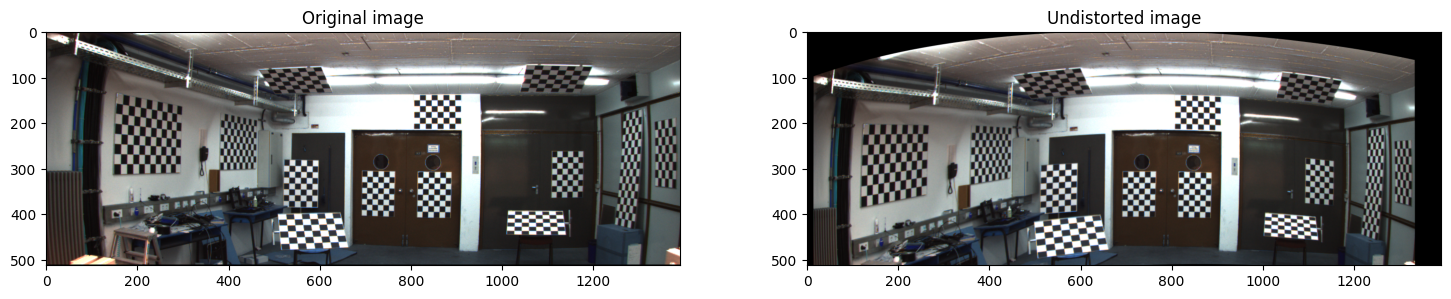

In [123]:
# undistord 
dst_left = cv2.undistort(img_left, K_left, dist_left, None, K_left)
dst_right = cv2.undistort(img_right, K_right, dist_left, None, K_left)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,18))
ax[0].imshow(img_left)
ax[0].set_title('Original image')
ax[1].imshow(dst_left)
ax[1].set_title('Undistorted image')

In [132]:
# rectification

ret, K1, D1, K2, D2, R, T, E, F = cv2.stereoCalibrate(objpoints, imgpoints_left, imgpoints_right, K_left, dist_left, K_right, dist_right, gray_left.shape[::-1], cv2.CALIB_FIX_INTRINSIC)

R1, R2, P1, P2, Q, roi_left, roi_right = cv2.stereoRectify(K_left, dist_left, K_right, dist_right, gray_left.shape[::-1], R, T, flags=cv2.CALIB_ZERO_DISPARITY, alpha=0)

map1_left, map2_left = cv2.initUndistortRectifyMap(K1, D1, R1, P1, gray_left.shape[::-1],  cv2.CV_32FC1)
map1_right, map2_right = cv2.initUndistortRectifyMap(K2, D2, R2, P2, gray_right.shape[::-1],  cv2.CV_32FC1)

left_rectified = cv2.remap(dst_left, map1_left, map2_left, cv2.INTER_LINEAR)
right_recified = cv2.remap(dst_right, map1_right, map2_right, cv2.INTER_LINEAR)


30.986333786703366


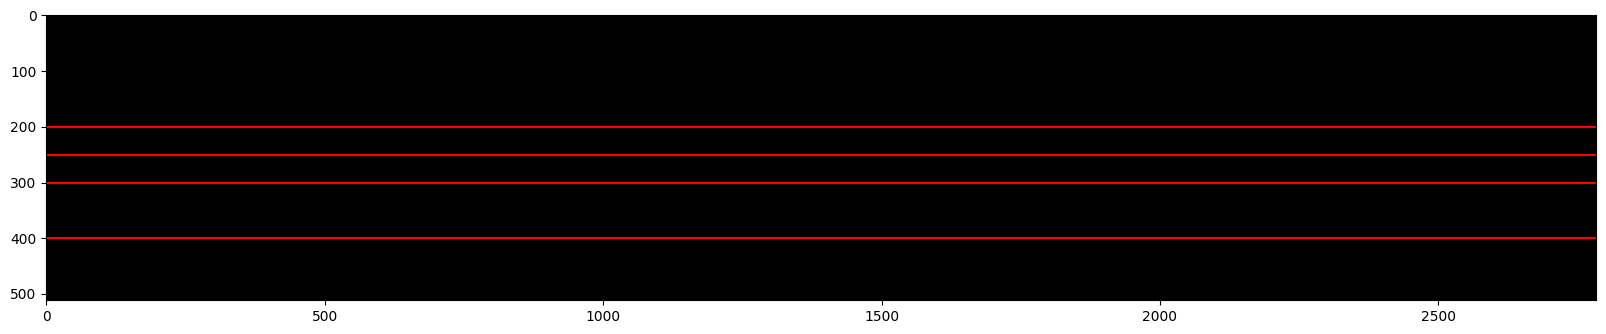

In [131]:
imgs_comb = np.hstack([left_rectified, right_recified])

plt.figure(figsize=(20,12))
plt.axhline(250, color='r') # horizontal
plt.axhline(200, color='r') # horizontal
plt.axhline(300, color='r') # horizontal
plt.axhline(400, color='r') # horizontal
plt.imshow(imgs_comb)
plt.show()

In [43]:
# try with areas 
patterns = [{'pattern': (5,7), 'count': 10,},    # 1208- 1320
            {'pattern': (7,11), 'count': 2},    # 0-466
            {'pattern': (5,15), 'count': 1}]    # 466-1208 and 1320 - 1390

images_left = sorted(glob.glob('/home/hhauter/Documents/S23/Perception/34759-Perception-Exercises/2023_final_project/final_project/calib/image_02/data/*.png'))
images_right = sorted(glob.glob('/home/hhauter/Documents/S23/Perception/34759-Perception-Exercises/2023_final_project/final_project/calib/image_03/data/*.png'))
assert images_left
assert images_right

test_img = cv2.imread(images_left[0])
imgpoints_left = []
imgpoints_right = []
# create mask to make already detected chessboards invisible
mask = np.zeros((test_img.shape[0], test_img.shape[1]), dtype=np.uint8)

# read images
img_left = cv2.imread(images_left[0])
gray_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)

img_right = cv2.imread(images_right[0])
gray_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)

cv2.imshow('img',img_left)
cv2.waitKey()

# start with the two on the left 
mask = np.zeros(img_left.shape[:2], dtype=np.uint8)
roi1 = (0, 0, 336, img_left.shape[0])
 
roi12 = (356, 177, 476-356, 355-177)
# roi12 = (336, 0, (476-336), img_left.shape[0])
roi2 = (466, 0, (1208-466), img_left.shape[0])
roi3 = (1208, 0, (1320-1208), img_left.shape[0])
roi4 = (1320, 0, img_left.shape[1]-1320, img_left.shape[0])
cv2.rectangle(mask, roi12, 255, -1)
###########################################################
pattern = (7,11)
# board 1
mask1 = np.zeros(img_left.shape[:2], dtype=np.uint8)
roi1 = (0, 0, 336, img_left.shape[0])
cv2.rectangle(mask1, roi1, 255, -1)
masked_img = cv2.bitwise_and(img_left, img_left, mask=mask1)
ret, corners_left = cv2.findChessboardCorners(masked_img, pattern, None)
print(corners_left)
img = cv2.drawChessboardCorners(masked_img, pattern, corners_left, ret)
cv2.imshow('img',img)
cv2.waitKey()

# board 2
mask2 = np.zeros(img_left.shape[:2], dtype=np.uint8)
roi2 = (356, 177, 476-356, 355-177)
cv2.rectangle(mask2, roi12, 255, -1)
masked_img = cv2.bitwise_and(img_left, img_left, mask=mask2)
blurred = cv2.GaussianBlur(masked_img, (0, 0), 3)
masked_img = cv2.addWeighted(masked_img, 1.5, blurred, -1.0, 0)
ret, corners_left = cv2.findChessboardCorners(masked_img, pattern, None)
print(corners_left)
img = cv2.drawChessboardCorners(masked_img, pattern, corners_left, ret)
cv2.imshow('img',img)
cv2.waitKey()

###########################################################
pattern = (5,7)
# board 3
mask3 = np.zeros(img_left.shape[:2], dtype=np.uint8)
roi3 = (466, 52, 640-466, 177-52)
cv2.rectangle(mask3, roi3, 255, -1)
masked_img = cv2.bitwise_and(img_left, img_left, mask=mask3)
blurred = cv2.GaussianBlur(masked_img, (0, 0), 3)
masked_img = cv2.addWeighted(masked_img, 1.5, blurred, -1.0, 0)
ret, corners_left = cv2.findChessboardCorners(masked_img, pattern, None)
print(corners_left)
img = cv2.drawChessboardCorners(masked_img, pattern, corners_left, ret)
cv2.imshow('img',img)
cv2.waitKey()

# x=(500,625) y=(394,270)

# x=(476,674) y=(500,395)

# x=(680,791) y=(435,290)
# x=(786,910) y=(435,290)

# x=(790,930) y=(220,125)

# x=(1022,1210) y=(150,60)
# x=(1090,1200) y=(380,240)

# x=(980,1160) y=(470,380)

# x=(1330,1390) y=(365,165)


###########################################################
pattern = (5,15)
# x=(1240,1318) y=(435,170)

# ret, corners_left = cv2.findChessboardCorners(masked_img, pattern, None)
# img = cv2.drawChessboardCorners(masked_img, pattern, corners_left, ret)
# cv2.imshow('img',img)
# cv2.waitKey()


# for pattern in patterns:
#     iterations = 0
#     print('Pattern: ')
#     print(pattern)
#     cnt = pattern['count']
#     count = 0
    
#     _pattern = pattern['pattern']
#     while count != cnt and iterations < (cnt * 2):
#         print("Count: ")
#         print(count)
#         print("Iteration: ")
#         print(iterations)
#         # detect chessboard corners for current pattern
#         ret, corners_left = cv2.findChessboardCorners(gray_left, pattern['pattern'], None)
#         ret_right, corners_right = cv2.findChessboardCorners(gray_right, pattern['pattern'], None)
        
        
#         # then if corners are found add them to detected list and update mask
#         if ret:
#             print("FOUND CHESSBOARD")
#             # add the corners to the detected chessboard list
#             imgpoints_left.append(corners_left)
#             imgpoints_right.append(corners_right)
            
#             # create a new mask for this chessboard and update overall mask
#             # chessboard_mask = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
#             mask = np.zeros_like(gray_left)
#             # square_points = np.int32([corners_left[0], corners_left[_pattern[0]-1], corners_left[_pattern[1]-1], corners_left[int(_pattern[0]*_pattern[1]-1)]])
#             # cv2.drawContours(mask, [np.int32(corners_left)], 0, (255, 255, 255), cv2.FILLED)
#             # cv2.fillPoly(mask, [np.int32(corners_left)], (255, 255, 255))
#             center = np.mean(corners_left, axis=0)[0]
#             mask = np.zeros_like(gray_left)
#             mask_width = 90
#             mask_height = 100
#             mask[int(center[1] - mask_height/2):int(center[1] + mask_height/2),
#                 int(center[0] - mask_width/2):int(center[0] + mask_width/2)] = 255

#             # apply the mask to the original image
#             masked_img_left = cv2.bitwise_and(gray_left, gray_left, mask=255-mask)

#             img = cv2.drawChessboardCorners(gray_left, pattern['pattern'], corners_left, ret)
#             cv2.imshow('img',img)
#             cv2.waitKey(700)
#             cv2.imshow('img',masked_img_left)
#             cv2.waitKey(700)

#             gray_left = masked_img_left
#             count += 1

#         iterations += 1
            



cv2.destroyAllWindows()



[[[163.85281 290.8096 ]]

 [[164.31229 269.01404]]

 [[164.57486 247.30855]]

 [[165.18323 225.64824]]

 [[166.36101 203.82063]]

 [[167.01753 182.35826]]

 [[168.47    160.56705]]

 [[177.43884 290.66467]]

 [[178.08159 269.5096 ]]

 [[178.46977 248.06476]]

 [[178.88795 226.60529]]

 [[179.92226 205.36441]]

 [[180.70096 184.27649]]

 [[181.785   162.70372]]

 [[190.81915 290.70166]]

 [[191.03737 270.1651 ]]

 [[191.54071 248.7367 ]]

 [[192.42389 227.98387]]

 [[192.90395 206.68608]]

 [[194.02197 186.06532]]

 [[194.78531 164.98596]]

 [[203.94621 290.72156]]

 [[204.36247 270.17844]]

 [[204.54648 249.54874]]

 [[205.02953 228.68742]]

 [[205.85617 208.34758]]

 [[206.6581  187.92178]]

 [[207.89334 167.35088]]

 [[216.34682 290.80884]]

 [[216.56242 270.55017]]

 [[216.96605 250.3769 ]]

 [[217.58327 230.14368]]

 [[218.45317 209.77751]]

 [[218.9731  189.56227]]

 [[220.34955 169.5933 ]]

 [[228.4558  290.76788]]

 [[228.68222 270.74152]]

 [[229.01038 250.75082]]

 [[229.86098

In [ ]:
ret, K_left, dist_left, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints_left, gray_left.shape[::-1], None, None)
ret, K_right, dist_right, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints_right, gray_right.shape[::-1], None, None)

h,  w = img_left.shape[:2]
# K_left, roi = cv2.getOptimalNewCameraMatrix(mtx_left,dist_left,(w,h),1,(w,h))
# K_right, roi = cv2.getOptimalNewCameraMatrix(mtx_right,dist_right,(w,h),1,(w,h))



In [ ]:
img1 = cv2.imread('/home/hhauter/Documents/S23/Perception/34759-Perception-Exercises/2023_final_project/final_project/calib/image_02/data/0000000000.png')
img2 = cv2.imread('/home/hhauter/Documents/S23/Perception/34759-Perception-Exercises/2023_final_project/final_project/calib/image_03/data/0000000000.png')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

dst_left = cv2.undistort(img1, K_left, dist_left, None, K_left)
dst_right = cv2.undistort(img2, K_right, dist_left, None, K_left)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,18))
ax[0].imshow(img1)
ax[0].set_title('Original image')
ax[1].imshow(dst_left)
ax[1].set_title('Undistorted image')

In [32]:
cv2.destroyAllWindows()